In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('car_prices.csv')

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

### COLUMNS
- YEAR 
- MAKE(Manufacturing of vechicle)
- MODEL
- TRIM
- BODY
- TRANSMISSION
- VIN(Vechical identification number)
- STATE
- CONDITION 
- ODOMETER
- COLOR
- INTERIOR
- SELLER
- SELLLING PRICE
- SALE DATE 
- MMR

In [5]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

### Observation 
- Transmission has maximun number of the null value.
- Year,State and Seller have no null values.
- Other features also have a certain amount of the null values.

In [6]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [7]:
df = df.drop(['vin', 'saledate','seller','model','trim'], axis  =1)

In [8]:
df

,year,make,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,Kia,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,BMW,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,Volvo,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0
4,2014,BMW,Sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,Sedan,NaN,in,45.0,18255.0,silver,black,35300.0,33000.0
558833,2012,Ram,Crew Cab,automatic,wa,5.0,54393.0,white,black,30200.0,30800.0
558834,2012,BMW,SUV,automatic,ca,48.0,50561.0,black,black,29800.0,34000.0
558835,2015,Nissan,sedan,automatic,ga,38.0,16658.0,white,black,15100.0,11100.0


In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),":",df[column].nunique())
        print()
        print(df[column].value_counts())
        print()

MAKE : 96

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64

BODY : 87

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64

TRANSMISSION : 4

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

STATE : 64

state
fl                   82945
ca                   73148
pa                   53907
tx                   45913
ga                   34750
                     ...  
3vwd17aj2fm285365        1
3vwd17aj3fm276741        1
3vwd17aj2fm258506        1
3vwd17aj4fm201708        1
3v

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


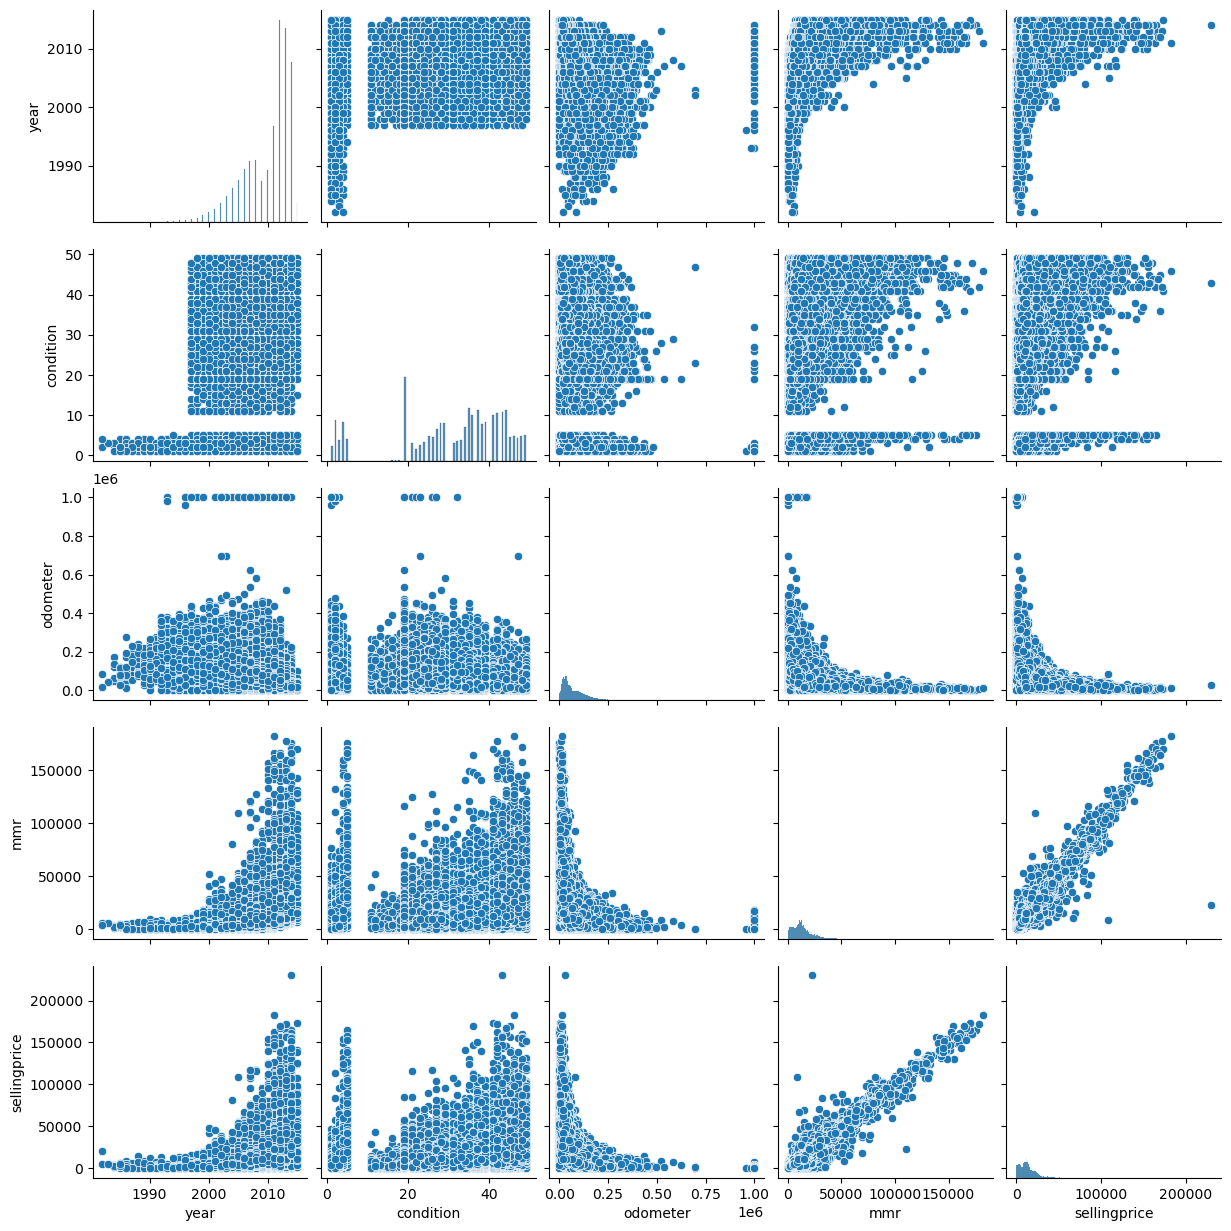

In [10]:
sns.pairplot(df)

### Observation
- In the above plot we can see that there is a linear relationship between mmr and selling price.

## Explanatory data  analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   body          545642 non-null  object 
 3   transmission  493485 non-null  object 
 4   state         558837 non-null  object 
 5   condition     547017 non-null  float64
 6   odometer      558743 non-null  float64
 7   color         558088 non-null  object 
 8   interior      558088 non-null  object 
 9   mmr           558799 non-null  float64
 10  sellingprice  558825 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 46.9+ MB


In [12]:
numeric_data = df.select_dtypes(['float64','int64'])
numeric_data

,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500.0,21500.0
1,2015,5.0,9393.0,20800.0,21500.0
2,2014,45.0,1331.0,31900.0,30000.0
3,2015,41.0,14282.0,27500.0,27750.0
4,2014,43.0,2641.0,66000.0,67000.0
...,...,...,...,...,...
558832,2015,45.0,18255.0,35300.0,33000.0
558833,2012,5.0,54393.0,30200.0,30800.0
558834,2012,48.0,50561.0,29800.0,34000.0
558835,2015,38.0,16658.0,15100.0,11100.0


In [13]:
categorical_data = df.select_dtypes('object')
categorical_data

,make,body,transmission,state,color,interior
0,Kia,SUV,automatic,ca,white,black
1,Kia,SUV,automatic,ca,white,beige
2,BMW,Sedan,automatic,ca,gray,black
3,Volvo,Sedan,automatic,ca,white,black
4,BMW,Sedan,automatic,ca,gray,black
...,...,...,...,...,...,...
558832,Kia,Sedan,NaN,in,silver,black
558833,Ram,Crew Cab,automatic,wa,white,black
558834,BMW,SUV,automatic,ca,black,black
558835,Nissan,sedan,automatic,ga,white,black


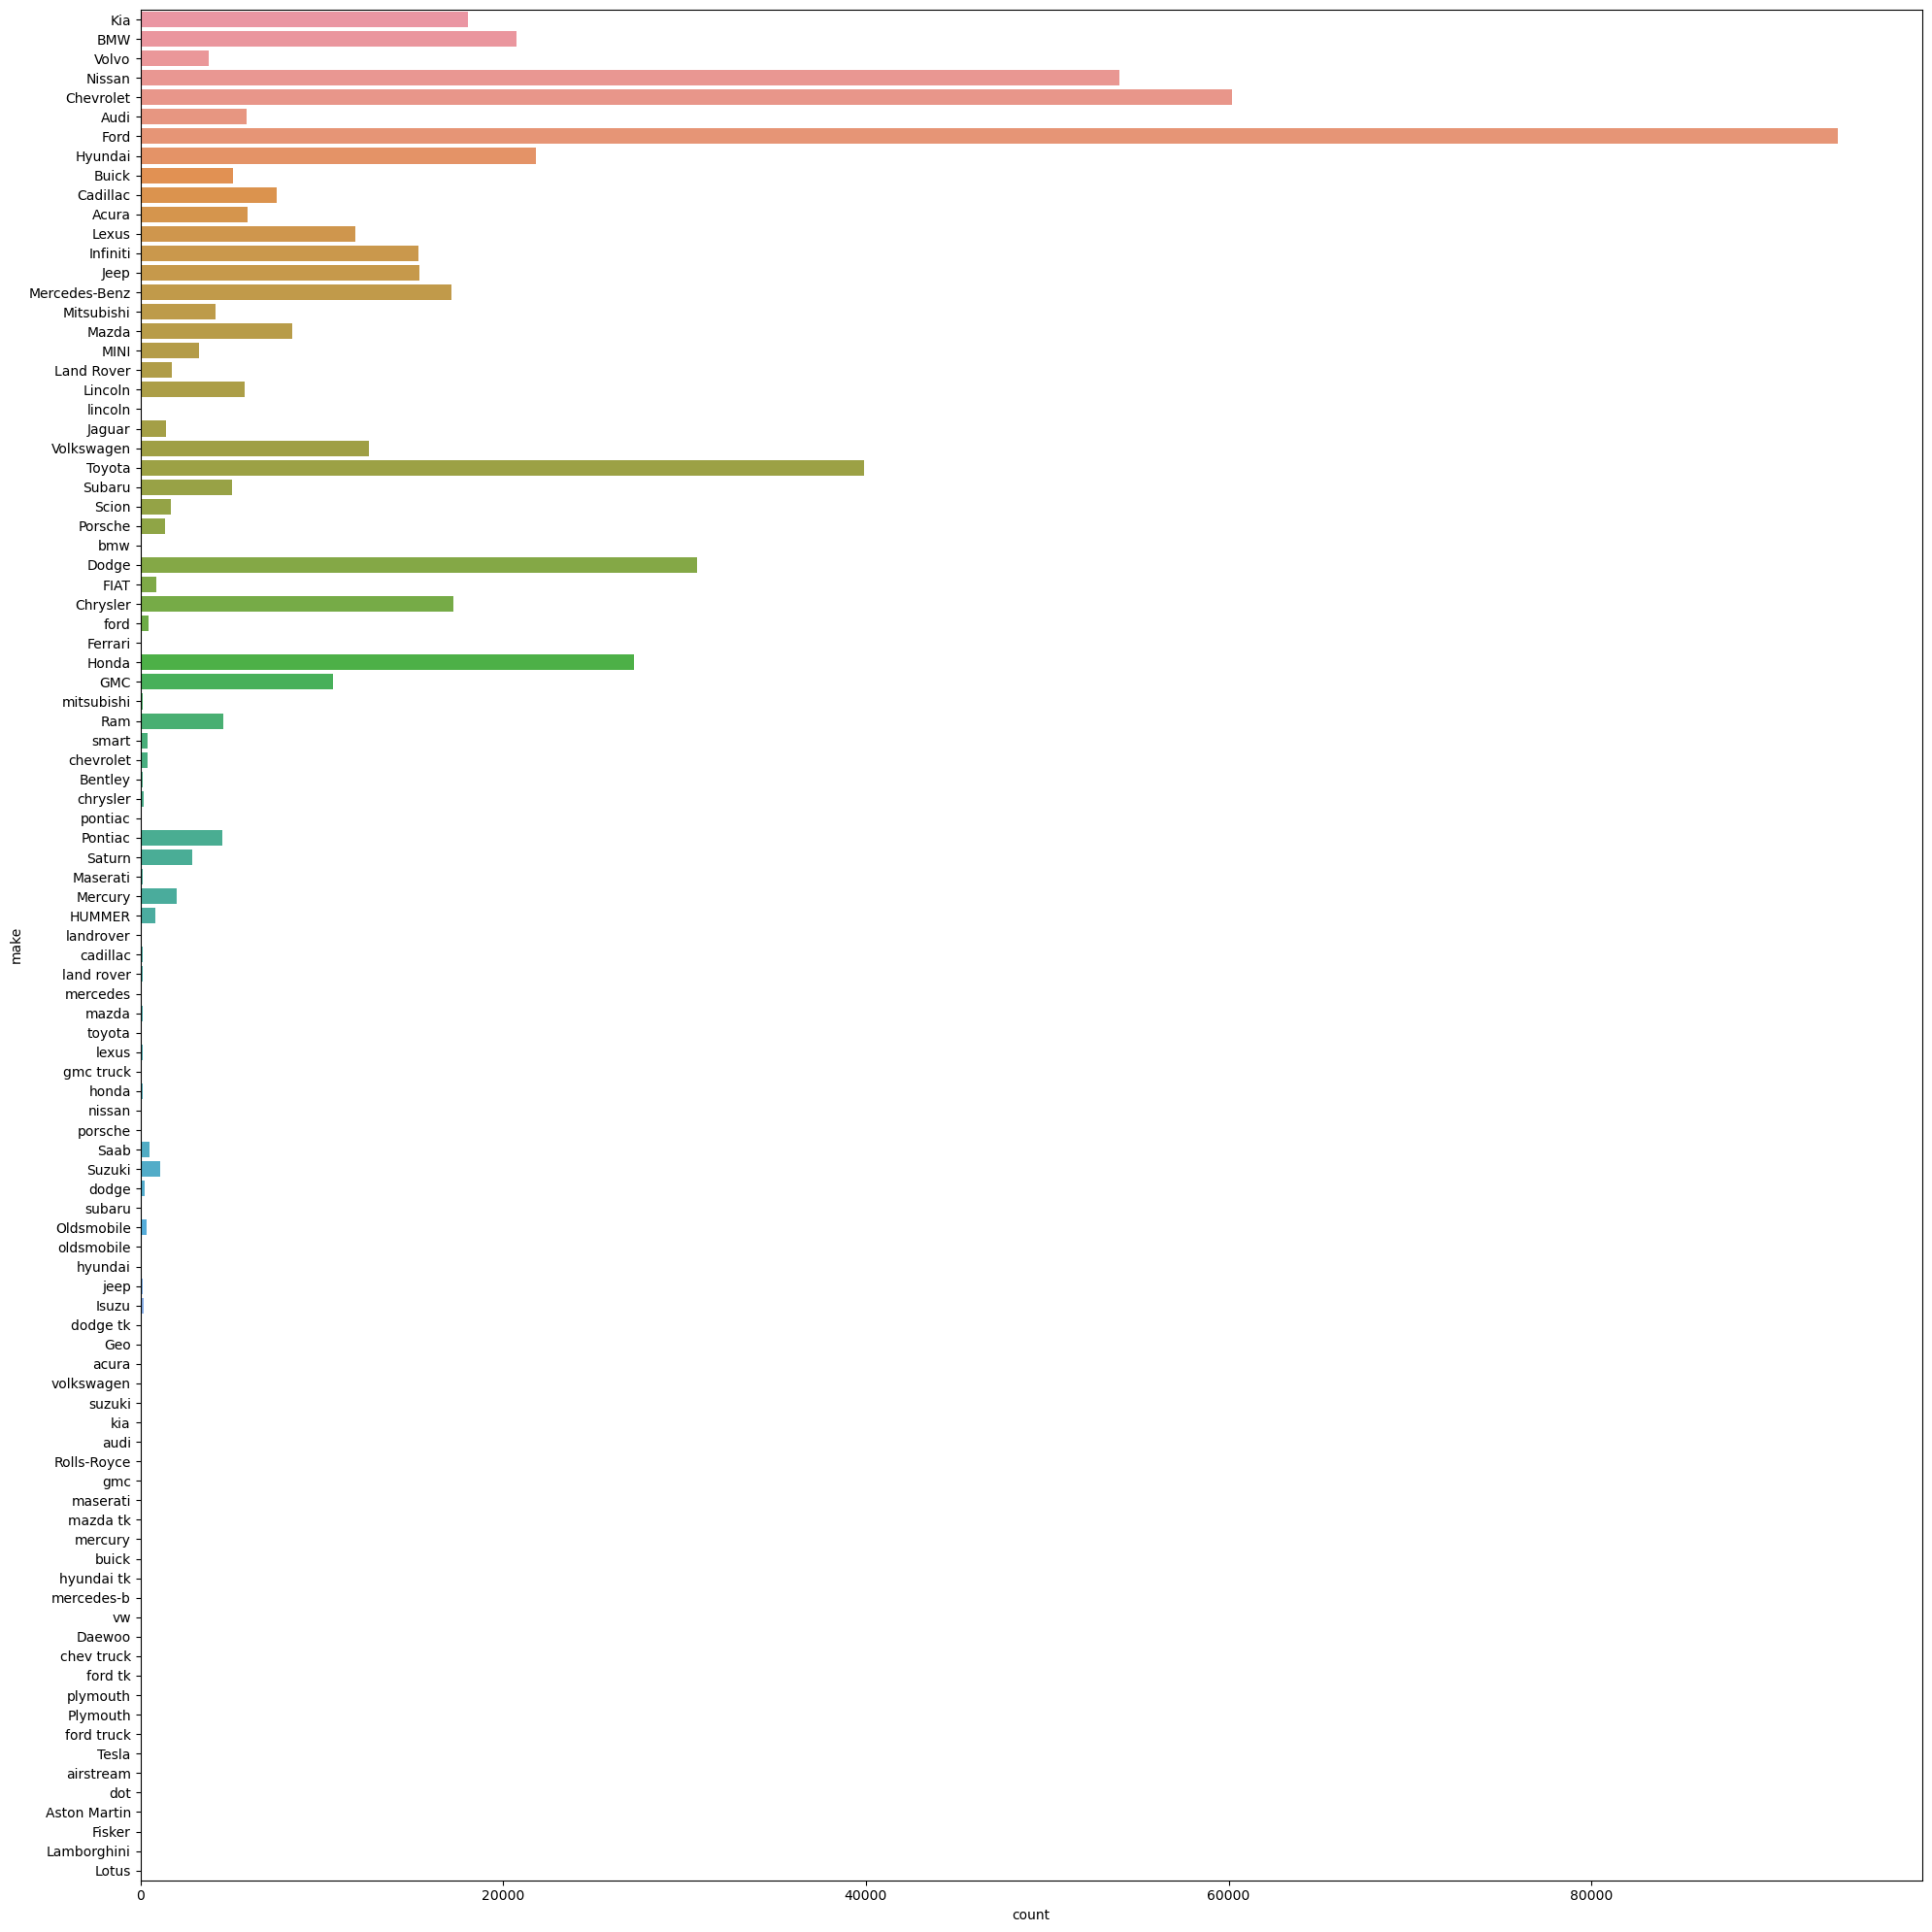

In [14]:
plt.figure(figsize=(20,20))
sns.countplot(y = 'make',data = df)
plt.tight_layout()

### Observation 
- There are very large number of outliers in the data 
- Very few brands are contributing in data 

In [15]:
categorical_data

,make,body,transmission,state,color,interior
0,Kia,SUV,automatic,ca,white,black
1,Kia,SUV,automatic,ca,white,beige
2,BMW,Sedan,automatic,ca,gray,black
3,Volvo,Sedan,automatic,ca,white,black
4,BMW,Sedan,automatic,ca,gray,black
...,...,...,...,...,...,...
558832,Kia,Sedan,NaN,in,silver,black
558833,Ram,Crew Cab,automatic,wa,white,black
558834,BMW,SUV,automatic,ca,black,black
558835,Nissan,sedan,automatic,ga,white,black


In [16]:
(df['make'].value_counts().head(10))

make
Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Honda        27206
Hyundai      21816
BMW          20719
Kia          18077
Chrysler     17276
Name: count, dtype: int64

<Axes: xlabel='make', ylabel='Count'>

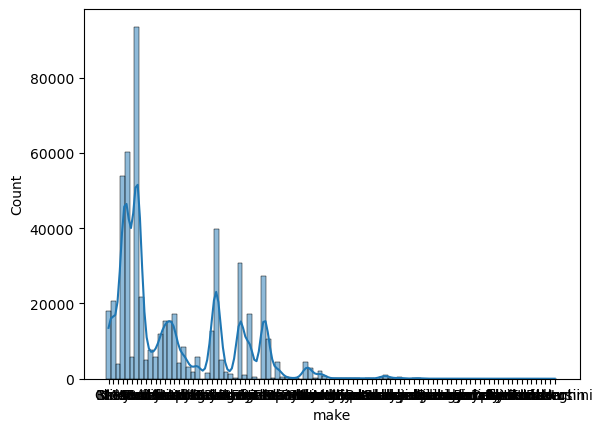

In [17]:
sns.histplot(x = 'make', data = df,kde = True,bins = 50)

### Thses are the top ten car maker brand in the market

In [18]:
df['body'].value_counts().head(10)

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
Minivan         21363
Coupe           14602
Wagon           13630
Crew Cab        13280
Convertible      8652
Name: count, dtype: int64

### Top 10 car body in the market

In [19]:
df['interior'].value_counts()

interior
black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

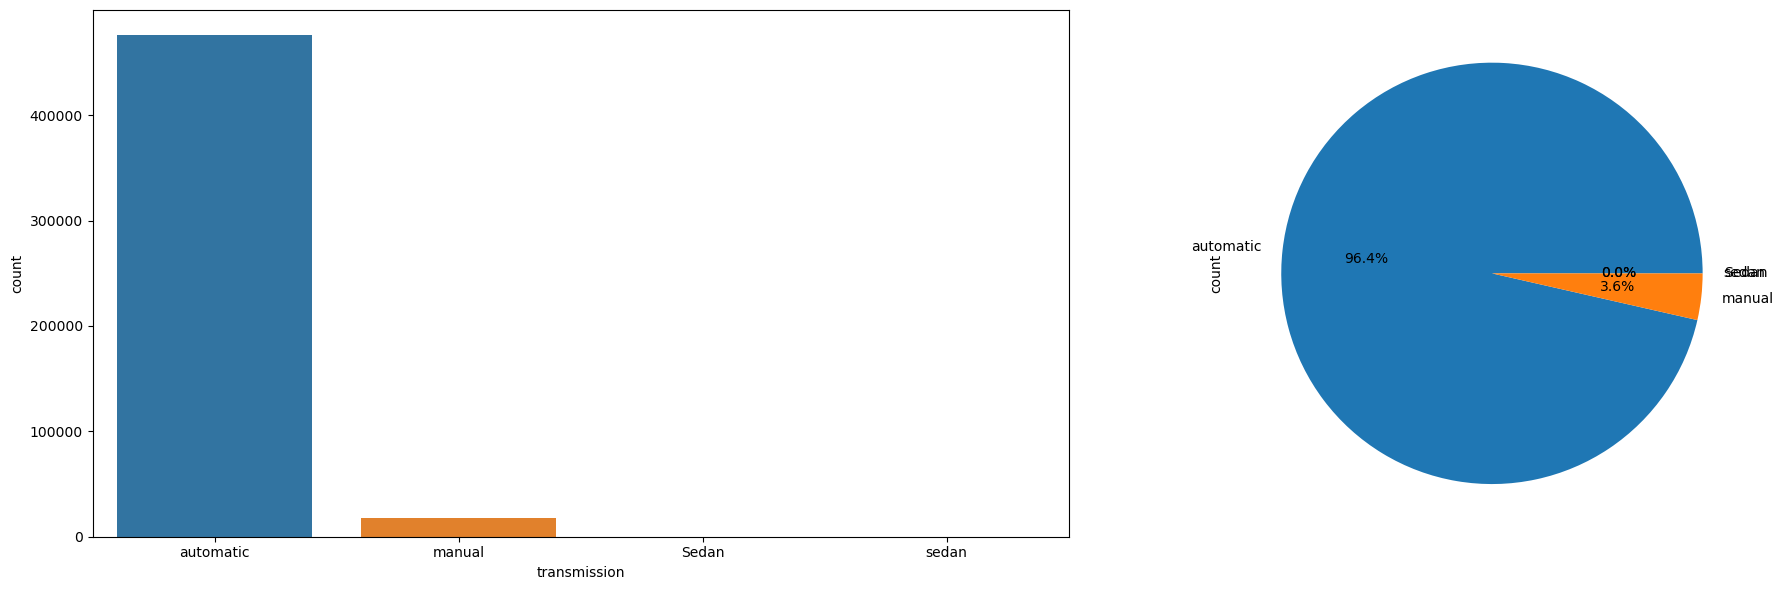

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x = 'transmission', data = df)
plt.subplot(1,2,2)
df['transmission'].value_counts().plot.pie(autopct='%1.1f%%')
plt.tight_layout()

 ## Data cleaning 

In [21]:
df.isnull().sum()

year                0
make            10301
body            13195
transmission    65352
state               0
condition       11820
odometer           94
color             749
interior          749
mmr                38
sellingprice       12
dtype: int64

In [22]:
df.dropna(subset = 'sellingprice',inplace = True)

In [23]:
df.dropna(subset = ['mmr','odometer'],inplace = True)

In [24]:
df['make'].mode()

0    Ford
Name: make, dtype: object

In [25]:
df['make'].fillna("Ford",inplace = True)

In [26]:
df['body'].fillna("sedan",inplace = True)

In [27]:
df['transmission'].fillna('automatic',inplace = True)

In [28]:
df['condition'].fillna(19.0,inplace = True)

In [29]:
df['color'].fillna('balck',inplace = True)

In [30]:
df['interior'].fillna('black',inplace = True)

In [31]:
df.isnull().sum()

year            0
make            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
dtype: int64

### We have treated all the null values in the data with mode and median 

In [32]:
top_10_make = [x for x in df.make.value_counts().sort_values(ascending=False).head(10).index]
top_10_make

['Ford',
 'Chevrolet',
 'Nissan',
 'Toyota',
 'Dodge',
 'Honda',
 'Hyundai',
 'BMW',
 'Kia',
 'Chrysler']

In [33]:
top_10_body = df['body'].value_counts().sort_values(ascending=False).head(10).index
top_10_state = df['state'].value_counts().sort_values(ascending=False).head(10).index
top_10_color = df['color'].value_counts().sort_values(ascending=False).head(10).index
top_10_interior = df['interior'].value_counts().sort_values(ascending=False).head(10).index

In [34]:
df = pd.get_dummies(df,columns =[ 'transmission'],drop_first = True)

In [35]:
def one_hot_top_x(data,variable,top_x_labels):
    
    for label in top_x_labels:
        data[variable+"_"+label] = np.where(data[variable]==label, 1,0)
        
one_hot_top_x(df,'make',top_10_body)        
        

In [36]:
one_hot_top_x(df,'body',top_10_body) 

In [37]:
one_hot_top_x(df,'state',top_10_state) 

In [38]:
one_hot_top_x(df,'color',top_10_color) 

In [39]:
one_hot_top_x(df,'interior',top_10_interior) 

In [40]:
df.drop(['make','body','color','interior','state'],axis = 1,inplace = True)

In [41]:
df['transmission_manual'] = df['transmission_manual'].map({False:0,True:1})

In [42]:
df.head()

,year,condition,odometer,mmr,sellingprice,transmission_manual,make_Sedan,make_SUV,make_sedan,make_suv,...,interior_black,interior_gray,interior_beige,interior_tan,interior_—,interior_brown,interior_red,interior_blue,interior_silver,interior_off-white
0,2015,5.0,16639.0,20500.0,21500.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2015,5.0,9393.0,20800.0,21500.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2014,45.0,1331.0,31900.0,30000.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2015,41.0,14282.0,27500.0,27750.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2014,43.0,2641.0,66000.0,67000.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [43]:
df_2 = df.copy()

In [44]:
df_3 = df.copy()

### We have created the copy of the data frame what we will be doing :-
- We will not be treating outliers in df.
- On df_2 we will be using modeling the outliers method, and on df_3 we will be removing the outliers.

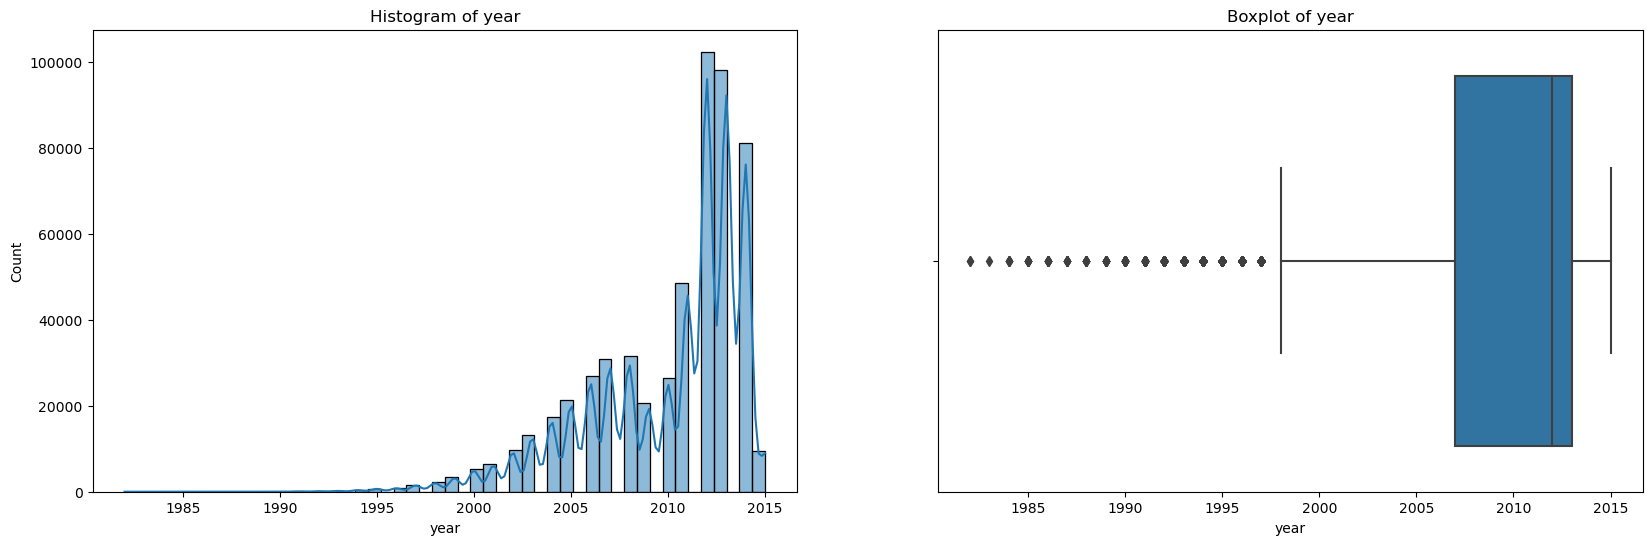

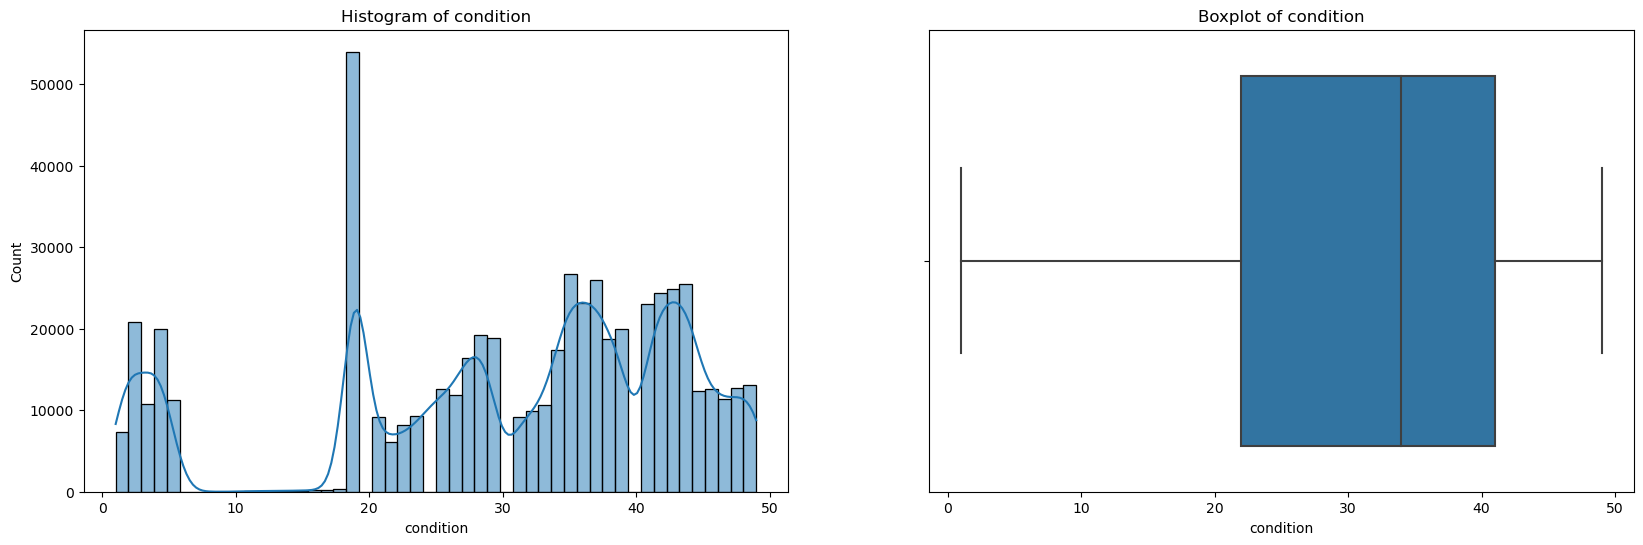

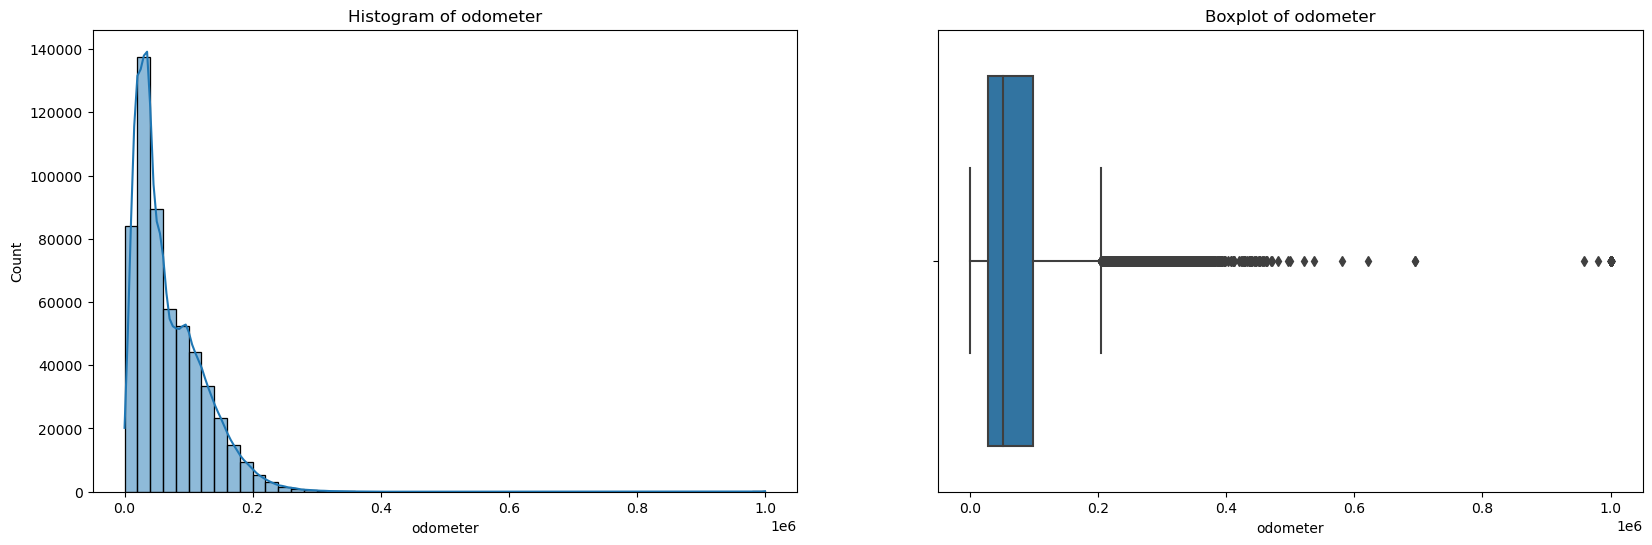

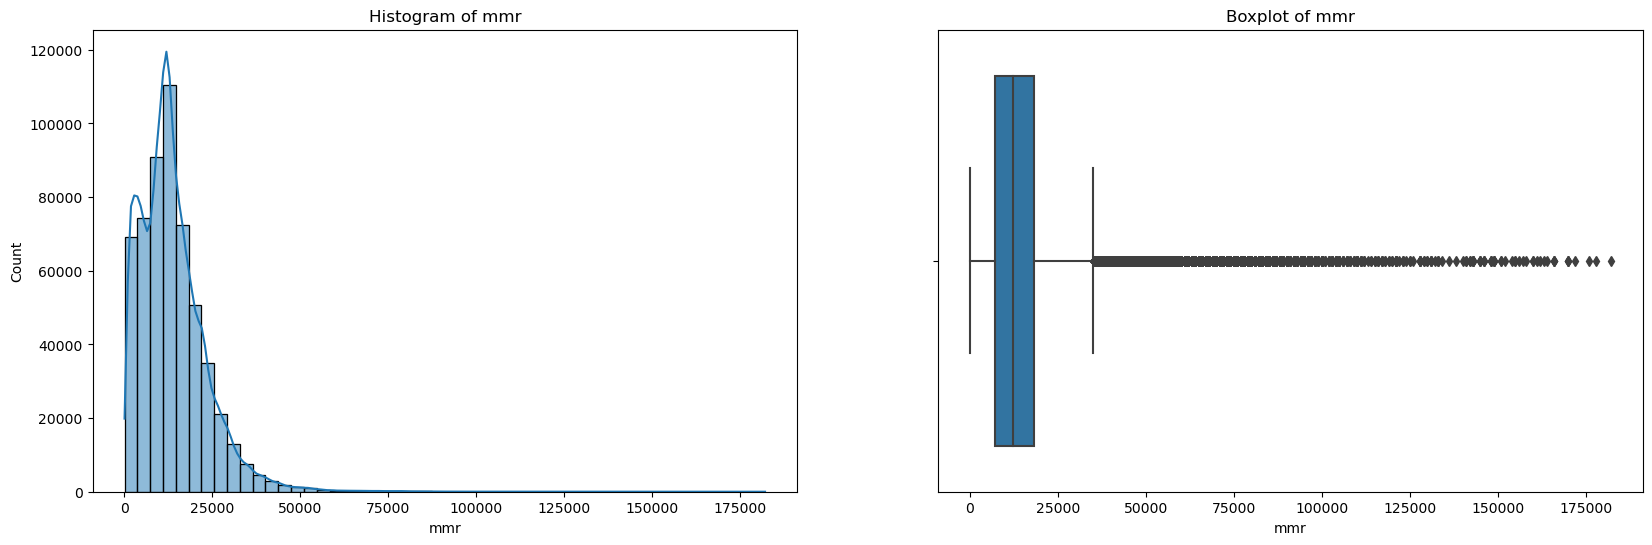

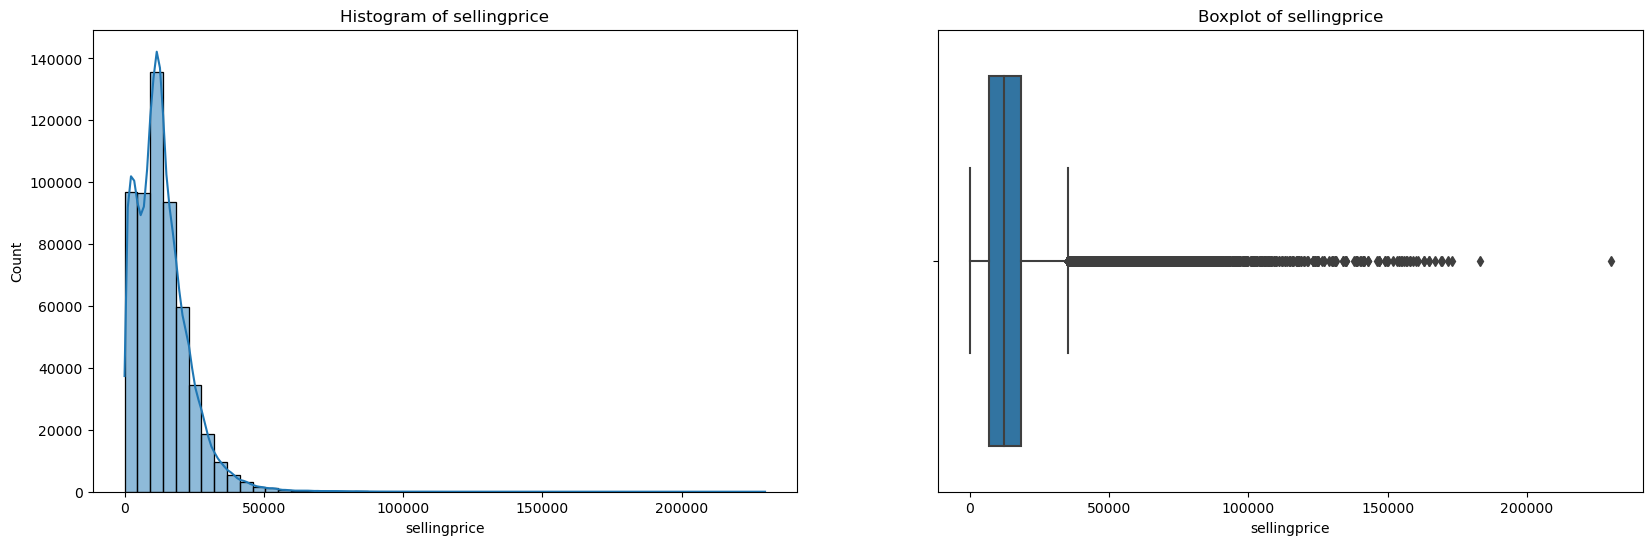

In [45]:
def get_plot(variable,dta):
    plt.figure(figsize=(20,6))
    # histogram
    plt.subplot(1,2,1)
    sns.histplot(x = dta[variable],data = dta,kde = True,bins = 50)
    plt.title("Histogram of {}".format(variable))
    # boxplot 
    plt.subplot(1,2,2)
    sns.boxplot(x=dta[variable])
    plt.title("Boxplot of {}".format(variable))
    
    
for cols in numeric_data:
    get_plot(cols,df)

### Observation 
- Selling price, mmr and odometer are right skewed data. This is probably because of outliers.
- There are a lot of outliers in the data.

### Treating outliers
### Using IQR Method
- Sort the data 
- Calculate the IQR (Q3-Q1)
- Q1= 25% and Q3 = 75%
- Find the lower fence (Q1-1.5(IQR)
- Find the upper fence (Q3+1.5(IQR))

In [46]:
def remove_outliers(cols):
    
        
    sorted(cols)
    Q1 = np.percentile(cols,[25])
    Q3 = np.percentile(cols,[75])
    
    IQR = Q3-Q1
    lower_fence = Q1-(1.5*IQR)
    upper_fence = Q3+(1.5*IQR)
    return lower_fence,upper_fence

In [47]:
remove_outliers(df_2['sellingprice'])

(array([-10050.]), array([35150.]))

In [48]:
df_2['sellingprice'] = df_2['sellingprice'].apply(lambda x:35150 if x>35150 else x)

In [49]:
remove_outliers(df_2['mmr'])

(array([-9700.]), array([35100.]))

In [50]:
df_2['mmr'] = df_2['mmr'].apply(lambda x:35100 if x>35100 else x)

In [51]:
remove_outliers(df_2['year'])

(array([1998.]), array([2022.]))

In [52]:
df_2['year'] = df_2['year'].apply(lambda x:1998 if x<1998 else x)

In [53]:
remove_outliers(df_2['odometer'])

(array([-77736.]), array([205224.]))

In [54]:
df_2['odometer'] = df_2['odometer'].apply(lambda x:205224 if x>205224 else x)

In [55]:
remove_outliers(df_2['condition'])

(array([-6.5]), array([69.5]))

In [56]:
df_2['condition'] = df_2['condition'].apply(lambda x:69.5 if x>69.5 else x)

In [57]:
df_2_numeric = df_2.select_dtypes(['float64','int64'])

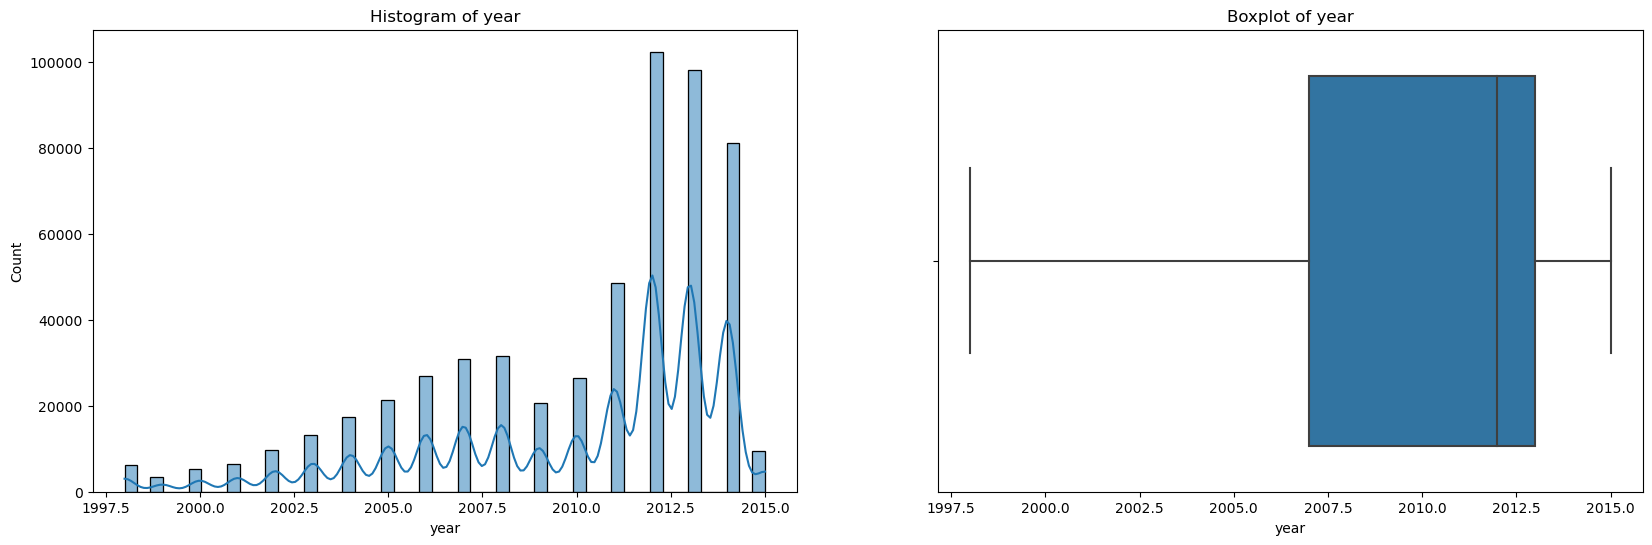

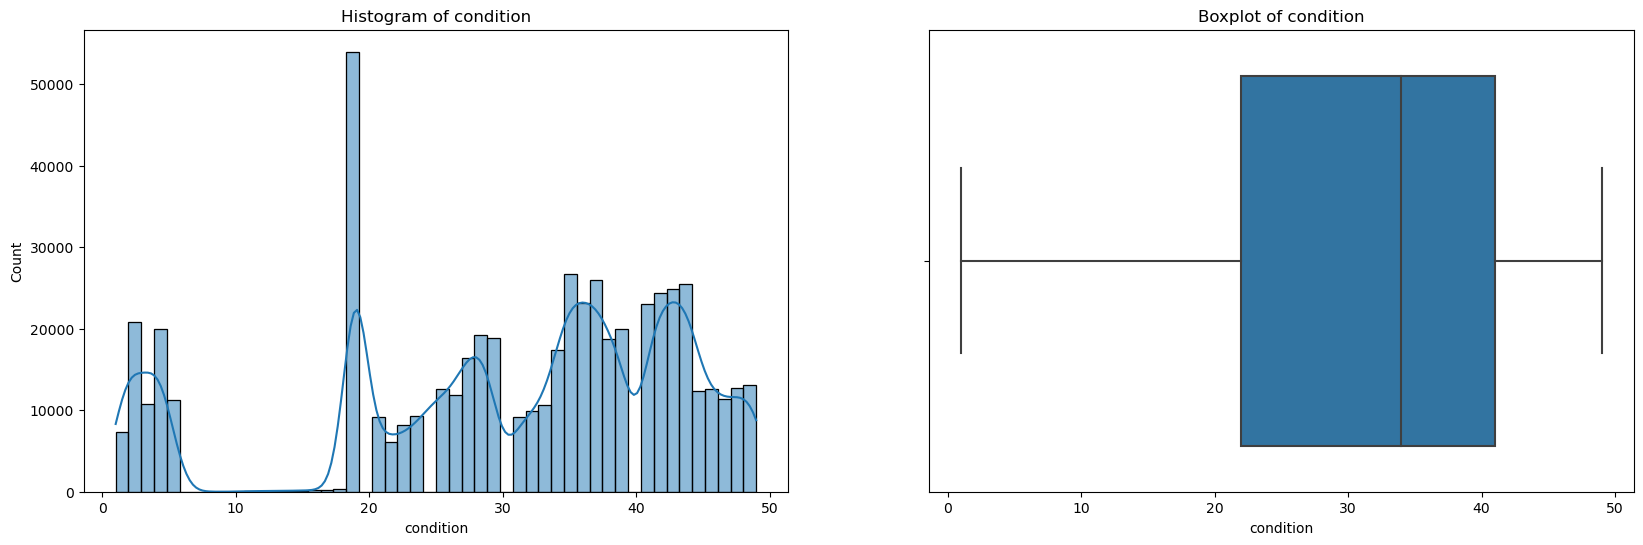

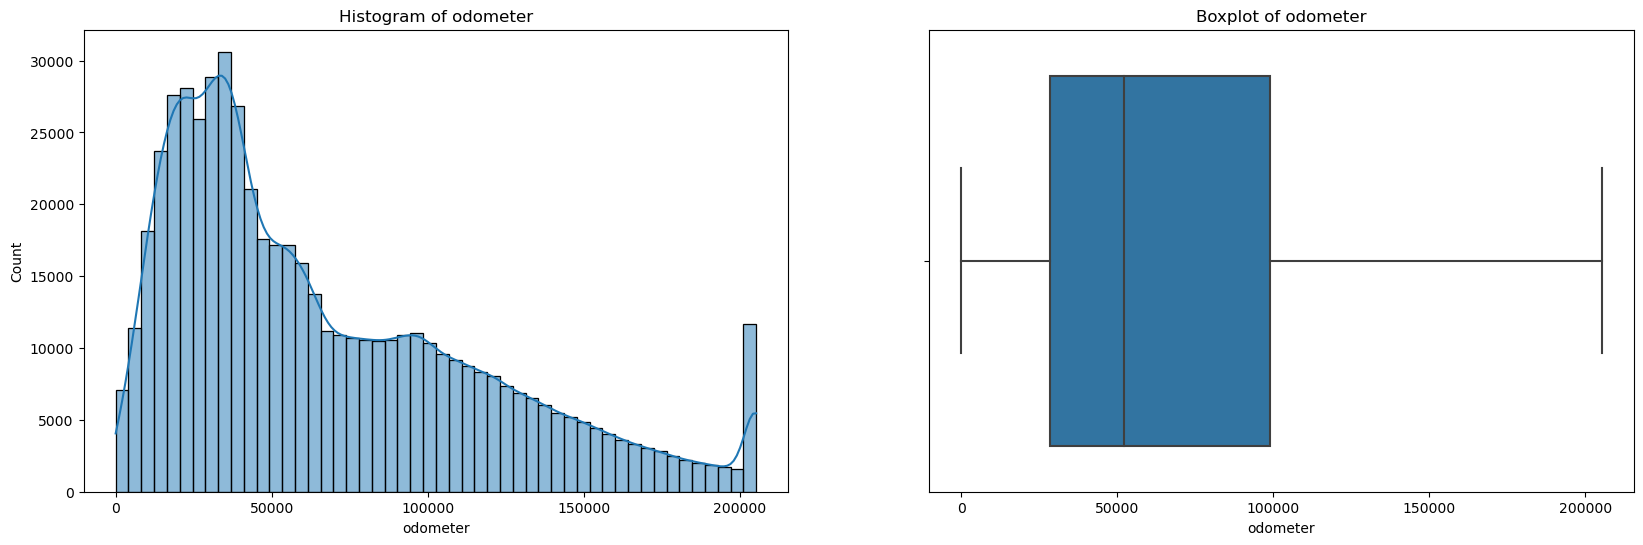

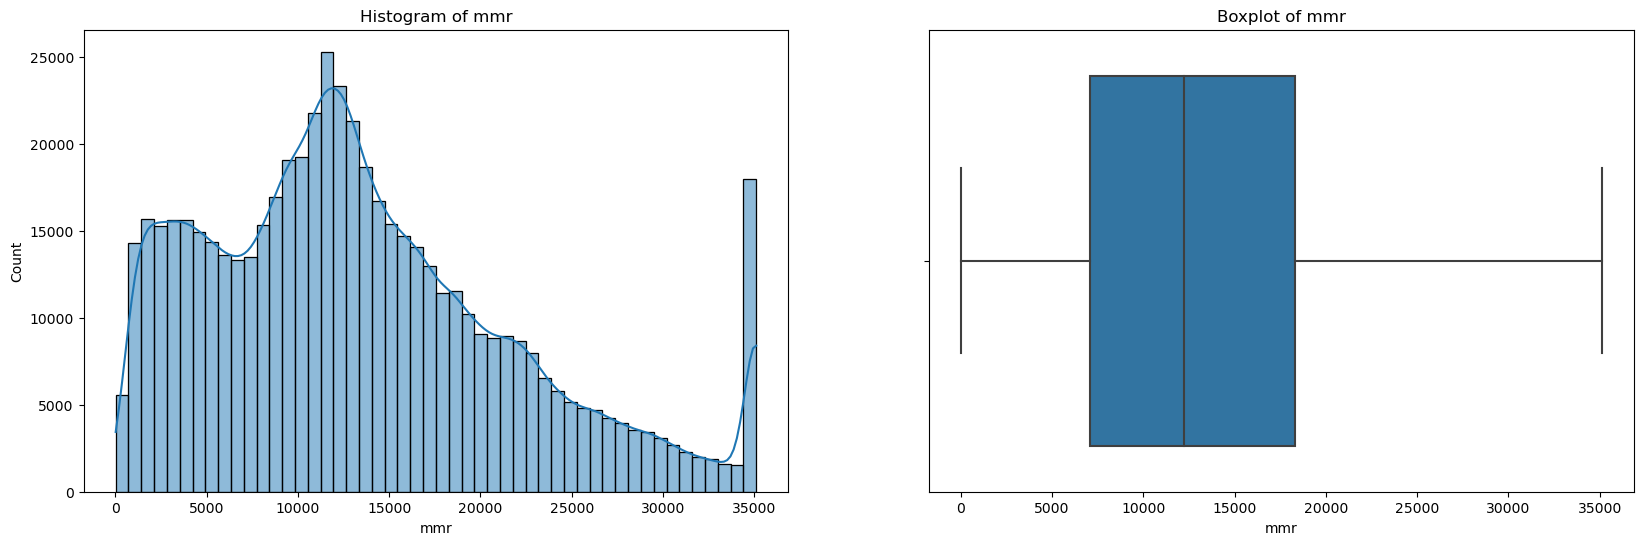

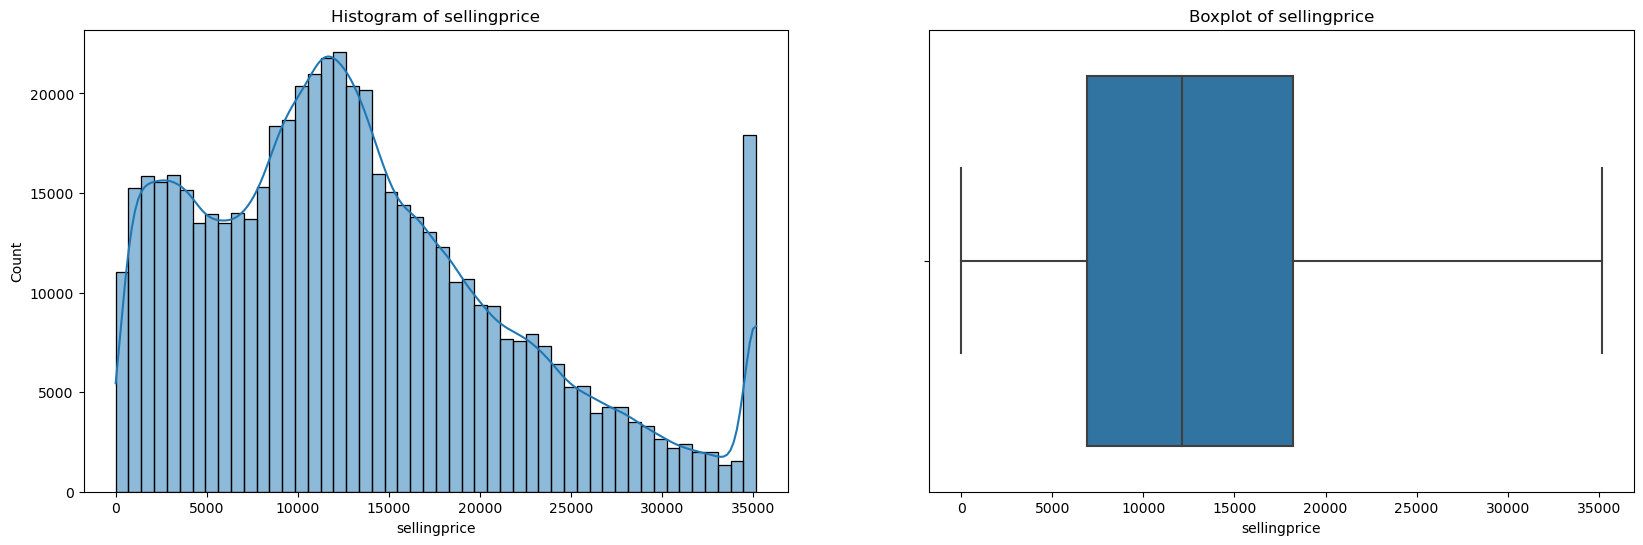

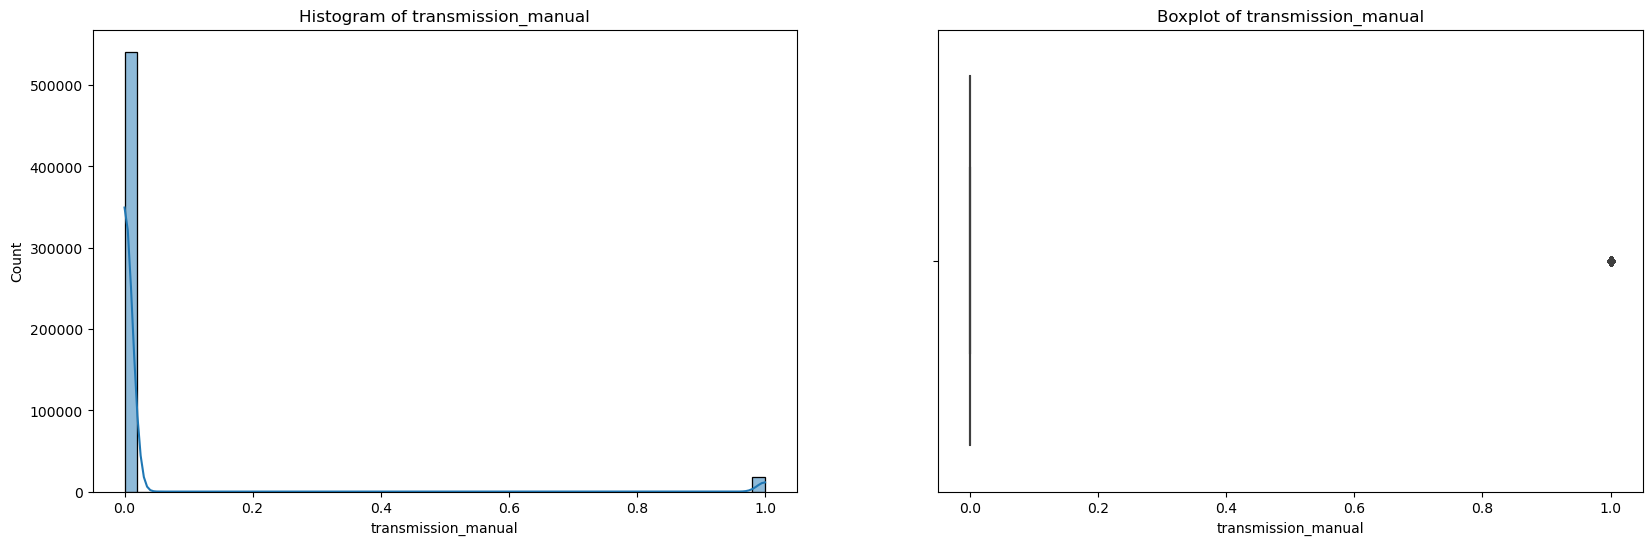

In [58]:
def get_plot(variable,dta):
    plt.figure(figsize=(20,6))
     # histogram
    plt.subplot(1,2,1)
    sns.histplot(x = dta[variable],data = dta,kde = True,bins = 50)
    plt.title("Histogram of {}".format(variable))
    # boxplot 
    plt.subplot(1,2,2)
    sns.boxplot(x=dta[variable])
    plt.title("Boxplot of {}".format(variable))
    
    
for cols in df_2_numeric:
    get_plot(cols,df_2)

In [59]:
remove_outliers(df_3['sellingprice'])

(array([-10050.]), array([35150.]))

In [60]:
df_3['sellingprice'] = df_3['sellingprice'].apply(lambda x:None if x>35150 else x)

In [61]:
remove_outliers(df_3['mmr'])

(array([-9700.]), array([35100.]))

In [62]:
df_3['mmr'] = df_2['mmr'].apply(lambda x:None if x>35100 else x)

In [63]:
remove_outliers(df_3['year'])

(array([1998.]), array([2022.]))

In [64]:
df_3['year'] = df_3['year'].apply(lambda x:None if x<1998 else x)

In [65]:
remove_outliers(df_3['odometer'])

(array([-77736.]), array([205224.]))

In [66]:
df_3['odometer'] = df_3['odometer'].apply(lambda x:None if x>205224 else x)

In [67]:
remove_outliers(df_3['condition'])

(array([-6.5]), array([69.5]))

In [68]:
df_3['condition'] = df_3['condition'].apply(lambda x:None if x>69.5 else x)

In [69]:
df_3.dropna(subset = ['sellingprice','condition','odometer','year','mmr'],inplace = True)

In [70]:
df_3_numeric = df_3.select_dtypes(['float64','int64'])

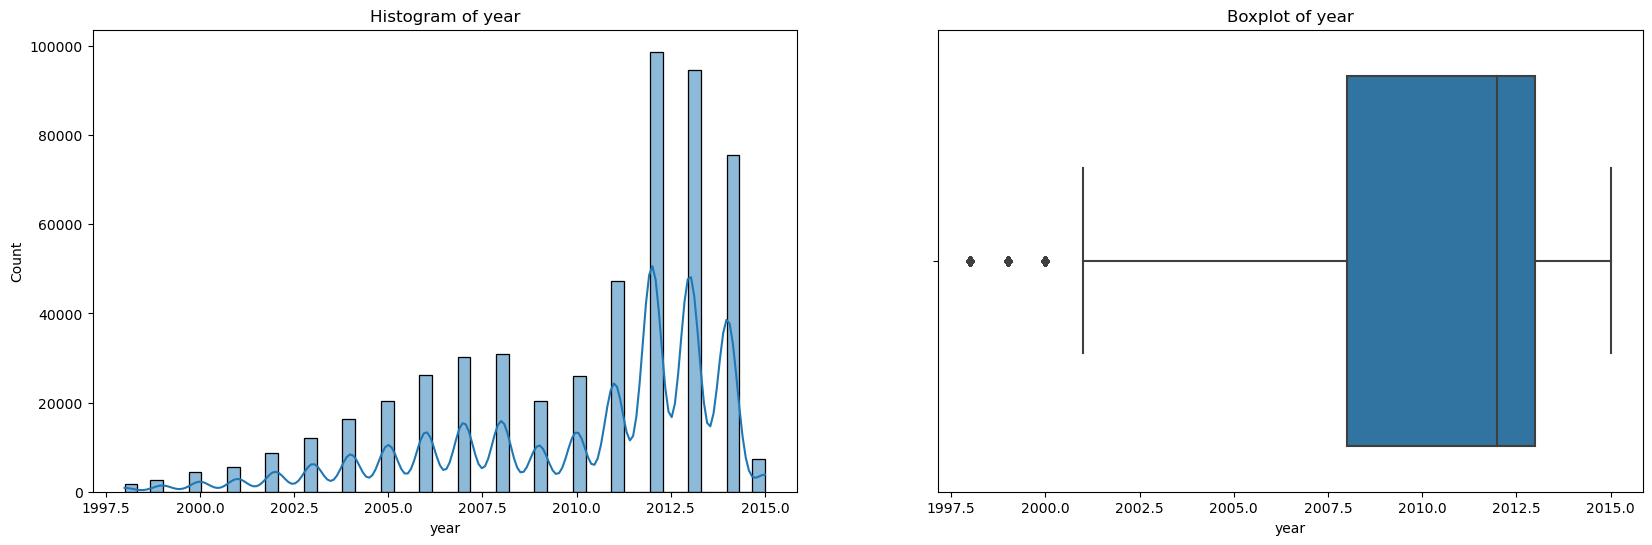

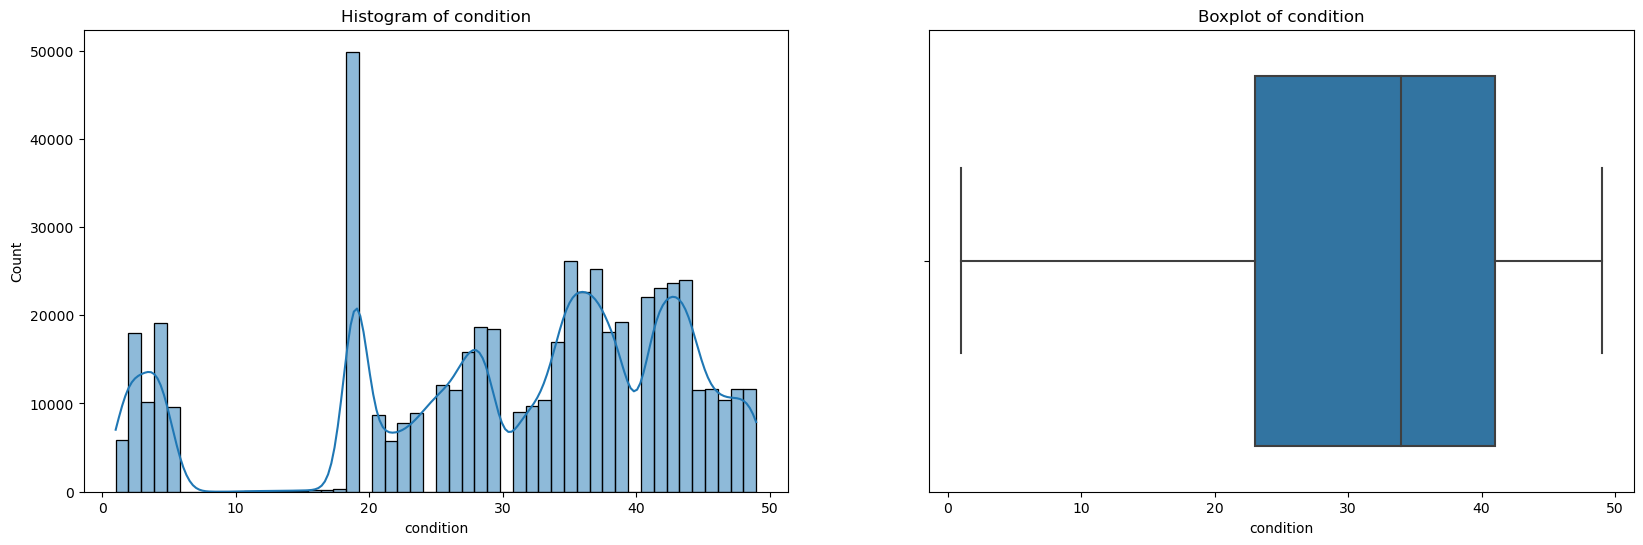

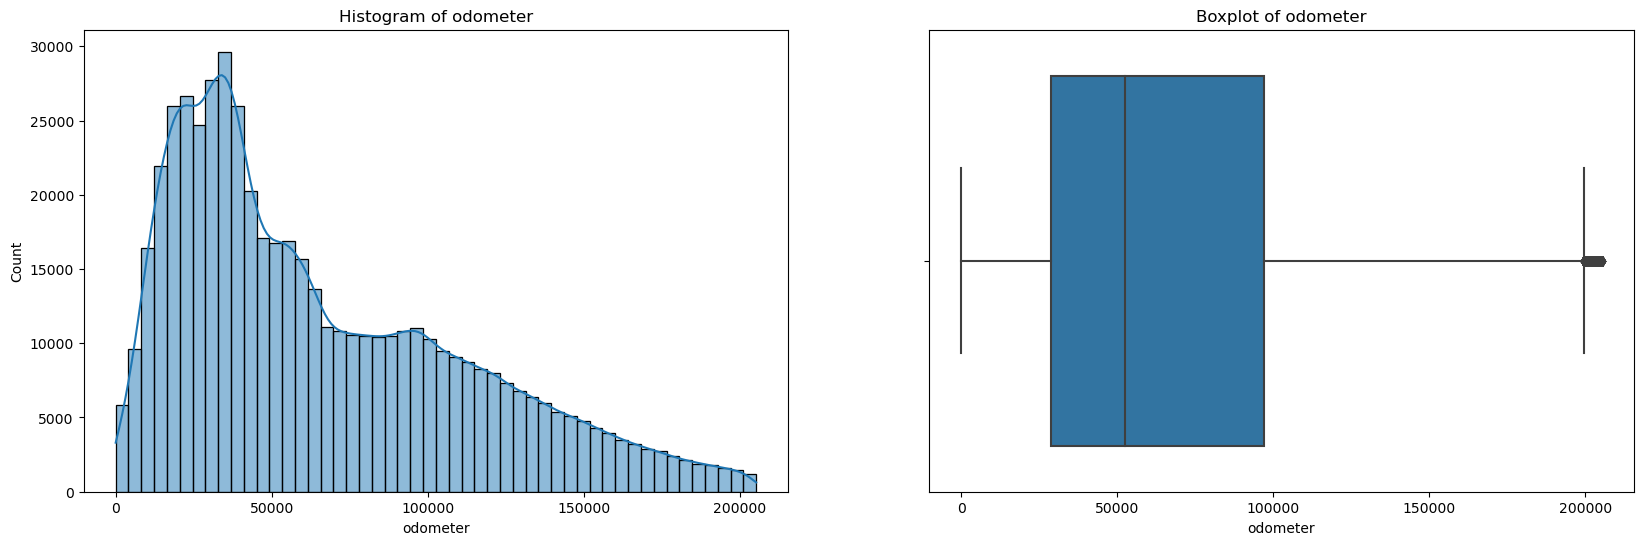

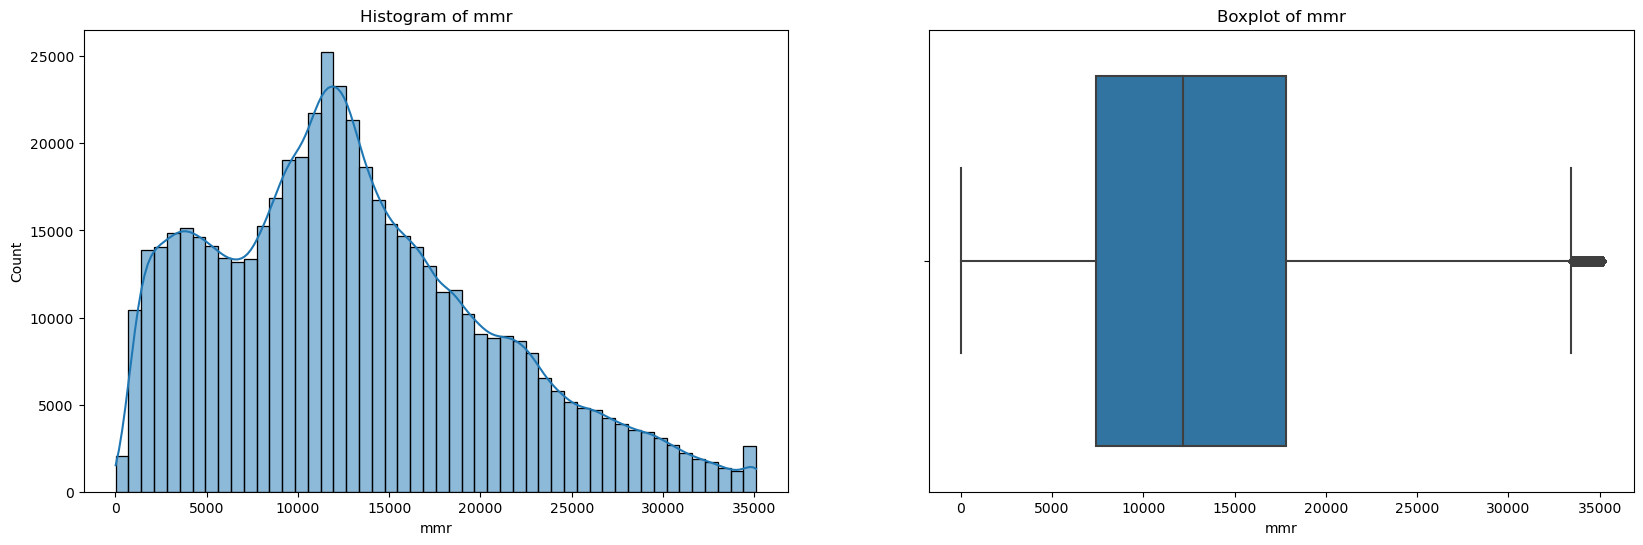

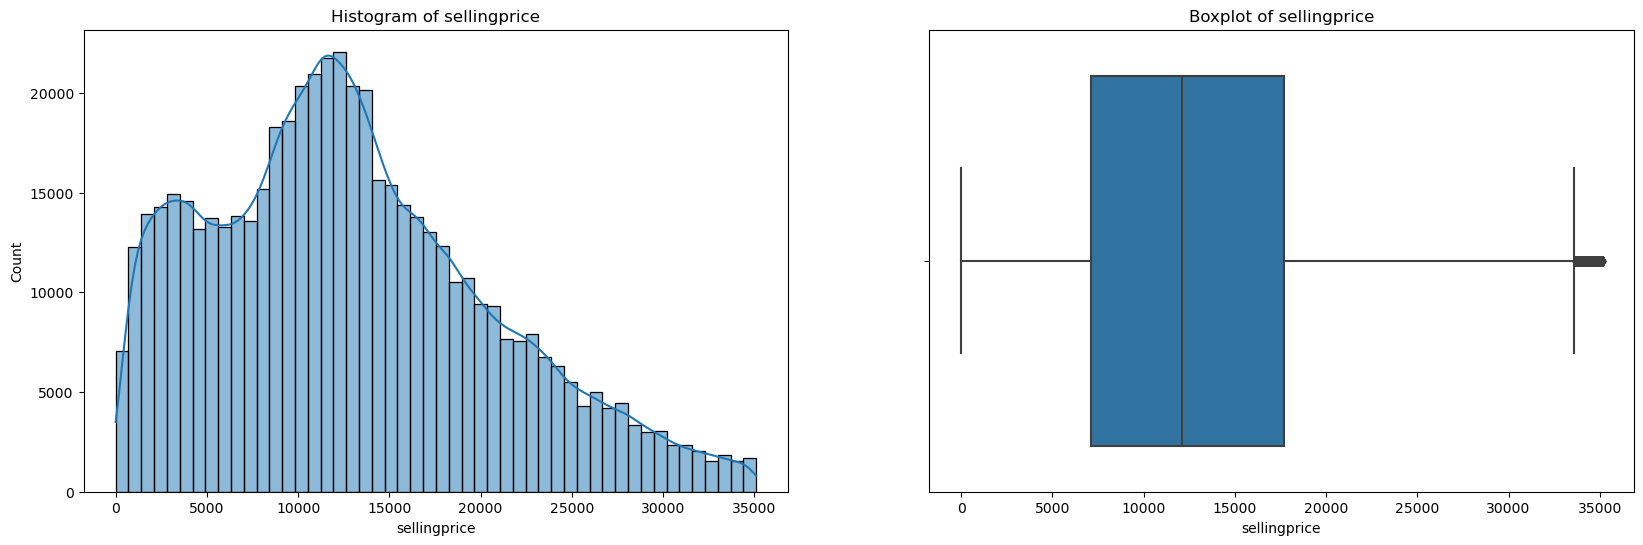

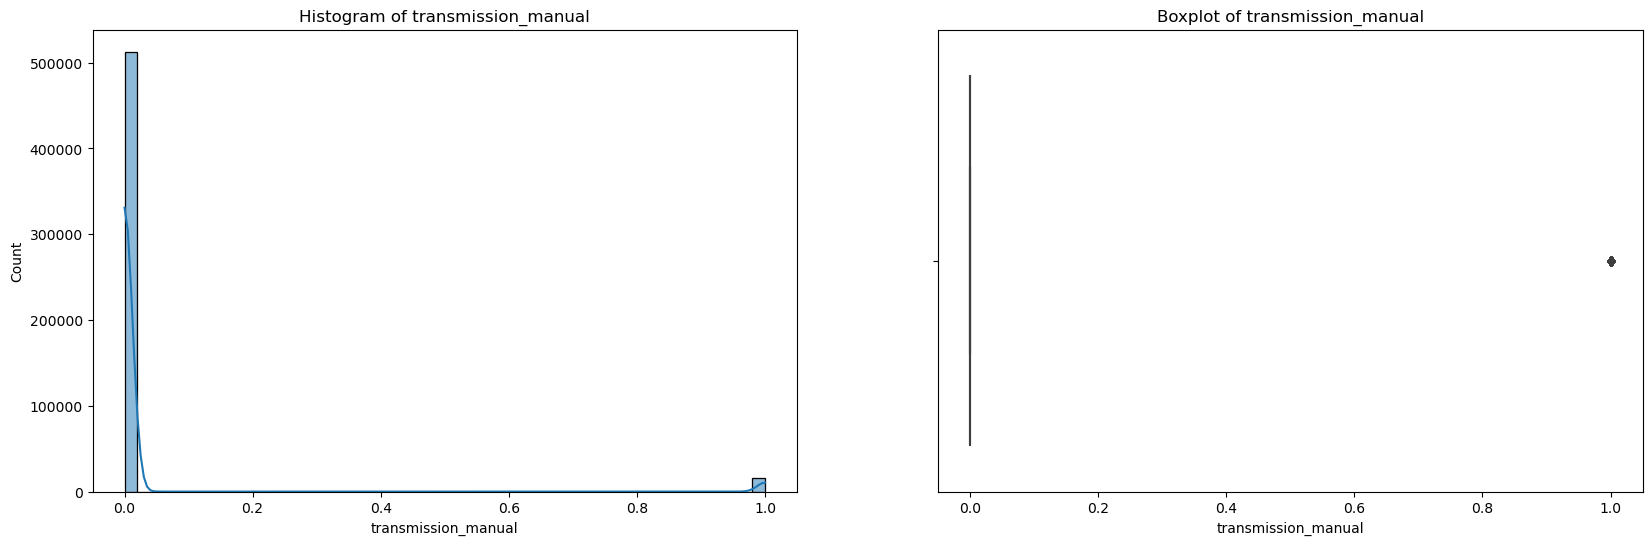

In [71]:
def get_plot(variable,dta):
    plt.figure(figsize=(20,6))
     # histogram
    plt.subplot(1,2,1)
    sns.histplot(x = dta[variable],data = dta,kde = True,bins = 50)
    plt.title("Histogram of {}".format(variable))
    # boxplot 
    plt.subplot(1,2,2)
    sns.boxplot(x=dta[variable])
    plt.title("Boxplot of {}".format(variable))
    
    
for cols in df_3_numeric:
    get_plot(cols,df_3)

### Outliers 
- df has outliers
- df_2 don't have outliers we have done outlier modeling
- df_3 also don't have outliers we have removed the outliers to an extent

In [72]:
df.to_csv('df.csv',index = False)

In [73]:
df_2.to_csv('df_2.csv',index = False)

In [74]:
df_3.to_csv('df_3.csv',index = False)